In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# pandasの表示を設定するよ
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:, 4f}'.format)

In [29]:
train = pd.read_csv('train_features_added.csv', encoding='utf-8')
test = pd.read_csv('test_features_added.csv', encoding='utf-8')


def format_date_time(df):

    df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

    return df


train = format_date_time(train)
test = format_date_time(test)

### ラグ特徴量、ローリング特徴量を学習データとテストデータに加えていく

まずは学習データとテストデータを時系列をキーに連結します

In [30]:
test_sub = test.drop(index=0, axis=0)

df_conc = pd.concat([train, test_sub]).reset_index()


In [31]:
# t-6までのラグ特徴量
df_conc['sensor_1_t-1'] = df_conc['sensor_1'].shift(1)
df_conc['sensor_1_t-2'] = df_conc['sensor_1'].shift(2)
df_conc['sensor_1_t-3'] = df_conc['sensor_1'].shift(3)
df_conc['sensor_1_t-4'] = df_conc['sensor_1'].shift(4)
df_conc['sensor_1_t-5'] = df_conc['sensor_1'].shift(5)
df_conc['sensor_1_t-6'] = df_conc['sensor_1'].shift(6)

df_conc['sensor_2_t-1'] = df_conc['sensor_2'].shift(1)
df_conc['sensor_2_t-2'] = df_conc['sensor_2'].shift(2)
df_conc['sensor_2_t-3'] = df_conc['sensor_2'].shift(3)
df_conc['sensor_2_t-4'] = df_conc['sensor_2'].shift(4)
df_conc['sensor_2_t-5'] = df_conc['sensor_2'].shift(5)
df_conc['sensor_2_t-6'] = df_conc['sensor_2'].shift(6)

df_conc['sensor_3_t-1'] = df_conc['sensor_3'].shift(1)
df_conc['sensor_3_t-2'] = df_conc['sensor_3'].shift(2)
df_conc['sensor_3_t-3'] = df_conc['sensor_3'].shift(3)
df_conc['sensor_3_t-4'] = df_conc['sensor_3'].shift(4)
df_conc['sensor_3_t-5'] = df_conc['sensor_3'].shift(5)
df_conc['sensor_3_t-6'] = df_conc['sensor_3'].shift(6)

df_conc['sensor_4_t-1'] = df_conc['sensor_4'].shift(1)
df_conc['sensor_4_t-2'] = df_conc['sensor_4'].shift(2)
df_conc['sensor_4_t-3'] = df_conc['sensor_4'].shift(3)
df_conc['sensor_4_t-4'] = df_conc['sensor_4'].shift(4)
df_conc['sensor_4_t-5'] = df_conc['sensor_4'].shift(5)
df_conc['sensor_4_t-6'] = df_conc['sensor_4'].shift(6)

df_conc['sensor_5_t-1'] = df_conc['sensor_5'].shift(1)
df_conc['sensor_5_t-2'] = df_conc['sensor_5'].shift(2)
df_conc['sensor_5_t-3'] = df_conc['sensor_5'].shift(3)
df_conc['sensor_5_t-4'] = df_conc['sensor_5'].shift(4)
df_conc['sensor_5_t-5'] = df_conc['sensor_5'].shift(5)
df_conc['sensor_5_t-6'] = df_conc['sensor_5'].shift(6)

df_conc['absolute_humidity_t-1'] = df_conc['absolute_humidity'].shift(1)
df_conc['absolute_humidity_t-2'] = df_conc['absolute_humidity'].shift(2)
df_conc['absolute_humidity_t-3'] = df_conc['absolute_humidity'].shift(3)
df_conc['absolute_humidity_t-4'] = df_conc['absolute_humidity'].shift(4)
df_conc['absolute_humidity_t-5'] = df_conc['absolute_humidity'].shift(5)
df_conc['absolute_humidity_t-6'] = df_conc['absolute_humidity'].shift(6)

df_conc['relative_humidity_t-1'] = df_conc['relative_humidity'].shift(1)
df_conc['relative_humidity_t-2'] = df_conc['relative_humidity'].shift(2)
df_conc['relative_humidity_t-3'] = df_conc['relative_humidity'].shift(3)
df_conc['relative_humidity_t-4'] = df_conc['relative_humidity'].shift(4)
df_conc['relative_humidity_t-5'] = df_conc['relative_humidity'].shift(5)
df_conc['relative_humidity_t-6'] = df_conc['relative_humidity'].shift(6)

df_conc['deg_C_t-1'] = df_conc['deg_C'].shift(1)
df_conc['deg_C_t-2'] = df_conc['deg_C'].shift(2)
df_conc['deg_C_t-3'] = df_conc['deg_C'].shift(3)
df_conc['deg_C_t-4'] = df_conc['deg_C'].shift(4)
df_conc['deg_C_t-5'] = df_conc['deg_C'].shift(5)
df_conc['deg_C_t-6'] = df_conc['deg_C'].shift(6)

df_conc['dew_point_t-1'] = df_conc['dew_point'].shift(1)
df_conc['dew_point_t-2'] = df_conc['dew_point'].shift(2)
df_conc['dew_point_t-3'] = df_conc['dew_point'].shift(3)
df_conc['dew_point_t-4'] = df_conc['dew_point'].shift(4)
df_conc['dew_point_t-5'] = df_conc['dew_point'].shift(5)
df_conc['dew_point_t-6'] = df_conc['dew_point'].shift(6)


# t-23からtまで（1日）のローリング特徴量（平均）
df_conc['sensor_1_mean24'] = df_conc['sensor_1'].rolling(window=24).mean()
df_conc['sensor_2_mean24'] = df_conc['sensor_2'].rolling(window=24).mean()
df_conc['sensor_3_mean24'] = df_conc['sensor_3'].rolling(window=24).mean()
df_conc['sensor_4_mean24'] = df_conc['sensor_4'].rolling(window=24).mean()
df_conc['sensor_5_mean24'] = df_conc['sensor_5'].rolling(window=24).mean()
df_conc['absolute_humidity_mean24'] = df_conc['absolute_humidity'].rolling(window=24).mean()
df_conc['relative_humidity_mean24'] = df_conc['relative_humidity'].rolling(window=24).mean()
df_conc['deg_C_mean24'] = df_conc['deg_C'].rolling(window=24).mean()
df_conc['dew_point_mean24'] = df_conc['dew_point'].rolling(window=24).mean()

# t-167からtまで（1週間）のローリング特徴量（平均）
df_conc['sensor_1_mean168'] = df_conc['sensor_1'].rolling(window=168).mean()
df_conc['sensor_2_mean168'] = df_conc['sensor_2'].rolling(window=168).mean()
df_conc['sensor_3_mean168'] = df_conc['sensor_3'].rolling(window=168).mean()
df_conc['sensor_4_mean168'] = df_conc['sensor_4'].rolling(window=168).mean()
df_conc['sensor_5_mean168'] = df_conc['sensor_5'].rolling(window=168).mean()
df_conc['absolute_humidity_mean168'] = df_conc['absolute_humidity'].rolling(window=168).mean()
df_conc['relative_humidity_mean168'] = df_conc['relative_humidity'].rolling(window=168).mean()
df_conc['deg_C_mean168'] = df_conc['deg_C'].rolling(window=168).mean()
df_conc['dew_point_mean168'] = df_conc['dew_point'].rolling(window=168).mean()

# t-23からtまで（1日）のローリング特徴量（Max）
df_conc['sensor_1_max24'] = df_conc['sensor_1'].rolling(window=24).max()
df_conc['sensor_2_max24'] = df_conc['sensor_2'].rolling(window=24).max()
df_conc['sensor_3_max24'] = df_conc['sensor_3'].rolling(window=24).max()
df_conc['sensor_4_max24'] = df_conc['sensor_4'].rolling(window=24).max()
df_conc['sensor_5_max24'] = df_conc['sensor_5'].rolling(window=24).max()
df_conc['absolute_humidity_max24'] = df_conc['absolute_humidity'].rolling(window=24).max()
df_conc['relative_humidity_max24'] = df_conc['relative_humidity'].rolling(window=24).max()
df_conc['deg_C_max24'] = df_conc['deg_C'].rolling(window=24).max()
df_conc['dew_point_max24'] = df_conc['dew_point'].rolling(window=24).max()

# t-167からtまで（1週間）のローリング特徴量（Max)
df_conc['sensor_1_max168'] = df_conc['sensor_1'].rolling(window=168).max()
df_conc['sensor_2_max168'] = df_conc['sensor_2'].rolling(window=168).max()
df_conc['sensor_3_max168'] = df_conc['sensor_3'].rolling(window=168).max()
df_conc['sensor_4_max168'] = df_conc['sensor_4'].rolling(window=168).max()
df_conc['sensor_5_max168'] = df_conc['sensor_5'].rolling(window=168).max()
df_conc['absolute_humidity_max168'] = df_conc['absolute_humidity'].rolling(window=168).max()
df_conc['relative_humidity_max168'] = df_conc['relative_humidity'].rolling(window=168).max()
df_conc['deg_C_max168'] = df_conc['deg_C'].rolling(window=168).max()
df_conc['dew_point_max168'] = df_conc['dew_point'].rolling(window=168).max()

# t-23からtまで（1日）のローリング特徴量（Min）
df_conc['sensor_1_min24'] = df_conc['sensor_1'].rolling(window=24).min()
df_conc['sensor_2_min24'] = df_conc['sensor_2'].rolling(window=24).min()
df_conc['sensor_3_min24'] = df_conc['sensor_3'].rolling(window=24).min()
df_conc['sensor_4_min24'] = df_conc['sensor_4'].rolling(window=24).min()
df_conc['sensor_5_min24'] = df_conc['sensor_5'].rolling(window=24).min()
df_conc['absolute_humidity_min24'] = df_conc['absolute_humidity'].rolling(window=24).min()
df_conc['relative_humidity_min24'] = df_conc['relative_humidity'].rolling(window=24).min()
df_conc['deg_C_min24'] = df_conc['deg_C'].rolling(window=24).min()
df_conc['dew_point_min24'] = df_conc['dew_point'].rolling(window=24).min()

# t-167からtまで（1週間）のローリング特徴量（Min)
df_conc['sensor_1_min168'] = df_conc['sensor_1'].rolling(window=168).min()
df_conc['sensor_2_min168'] = df_conc['sensor_2'].rolling(window=168).min()
df_conc['sensor_3_min168'] = df_conc['sensor_3'].rolling(window=168).min()
df_conc['sensor_4_min168'] = df_conc['sensor_4'].rolling(window=168).min()
df_conc['sensor_5_min168'] = df_conc['sensor_5'].rolling(window=168).min()
df_conc['absolute_humidity_min168'] = df_conc['absolute_humidity'].rolling(window=168).min()
df_conc['relative_humidity_min168'] = df_conc['relative_humidity'].rolling(window=168).min()
df_conc['deg_C_min168'] = df_conc['deg_C'].rolling(window=168).min()
df_conc['dew_point_min168'] = df_conc['dew_point'].rolling(window=168).min()



ちなみにどんな形をしてるか

<function matplotlib.pyplot.show(close=None, block=None)>

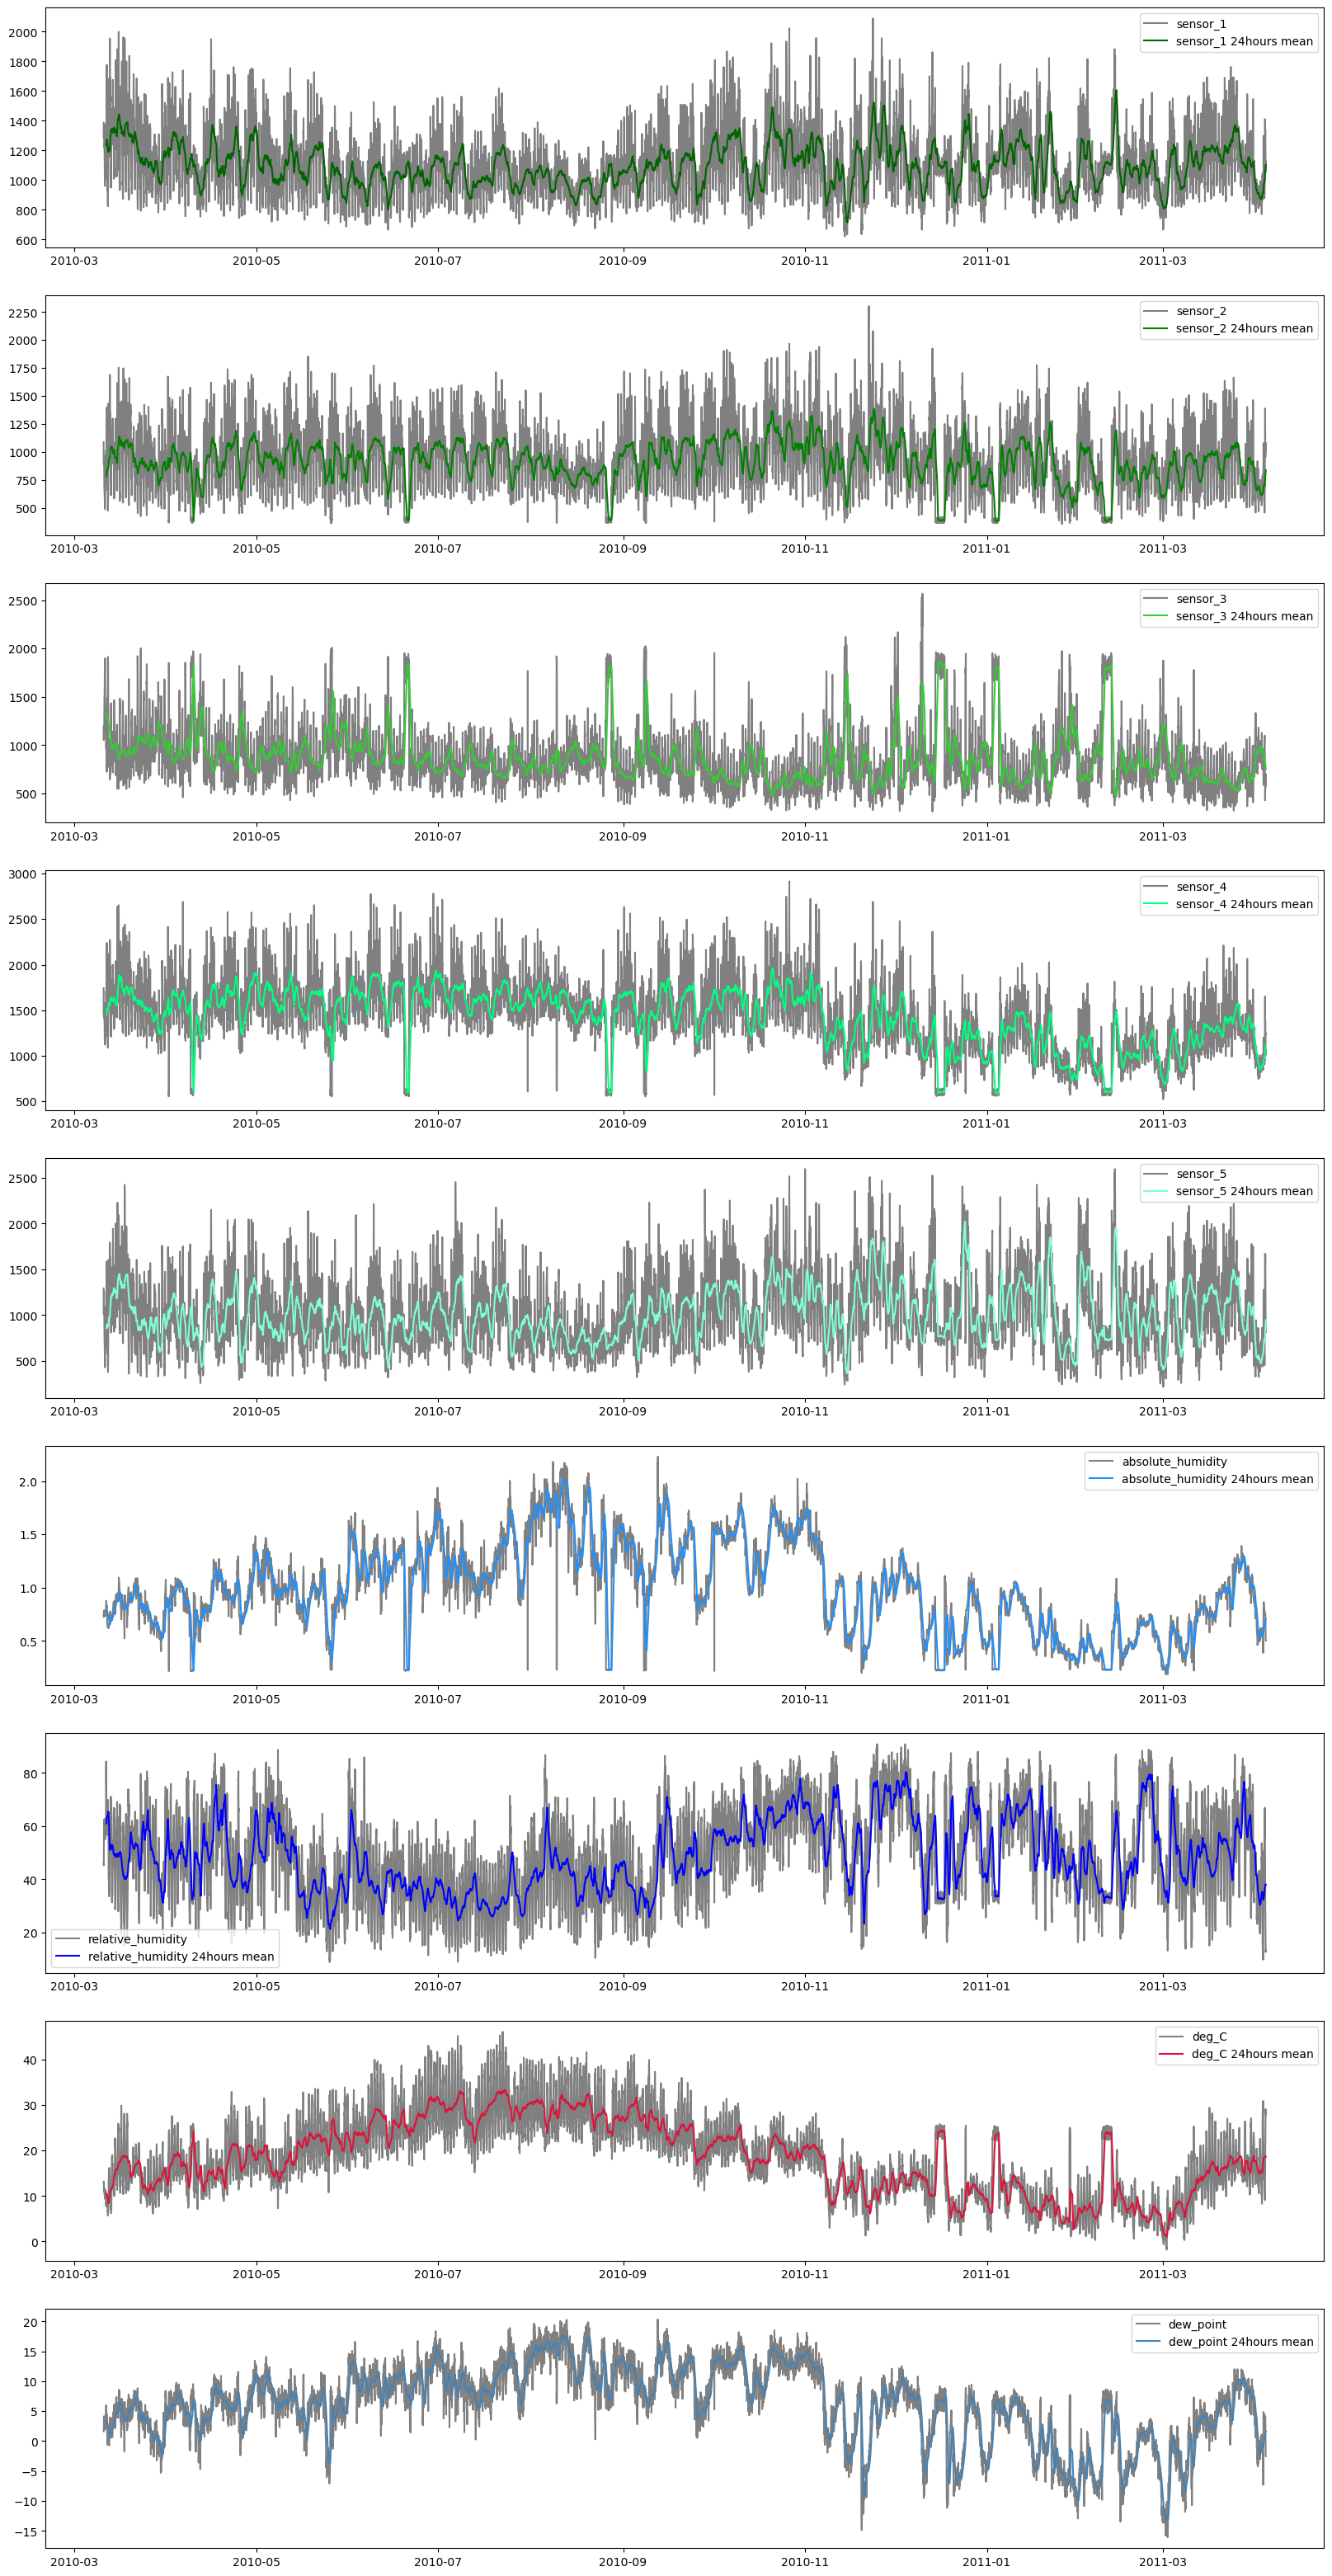

In [32]:
targets1 = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
targets2 = ['sensor_1_mean24', 'sensor_2_mean24', 'sensor_3_mean24', 'sensor_4_mean24', 'sensor_5_mean24', 
            'absolute_humidity_mean24', 'relative_humidity_mean24', 'deg_C_mean24', 'dew_point_mean24']
target_names = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
colors = ["darkgreen", "green", "limegreen", "springgreen", "aquamarine", "dodgerblue", "blue", "crimson", "steelblue"]

fig, axs = plt.subplots(figsize=(20,40), nrows=9, ncols=1)

for i in range(9):
    axs[i].plot(df_conc['date_time'], df_conc[targets1[i]], color='gray', label=target_names[i])
    axs[i].plot(df_conc['date_time'], df_conc[targets2[i]], color=colors[i], label=f'{target_names[i]} 24hours mean')
    axs[i].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

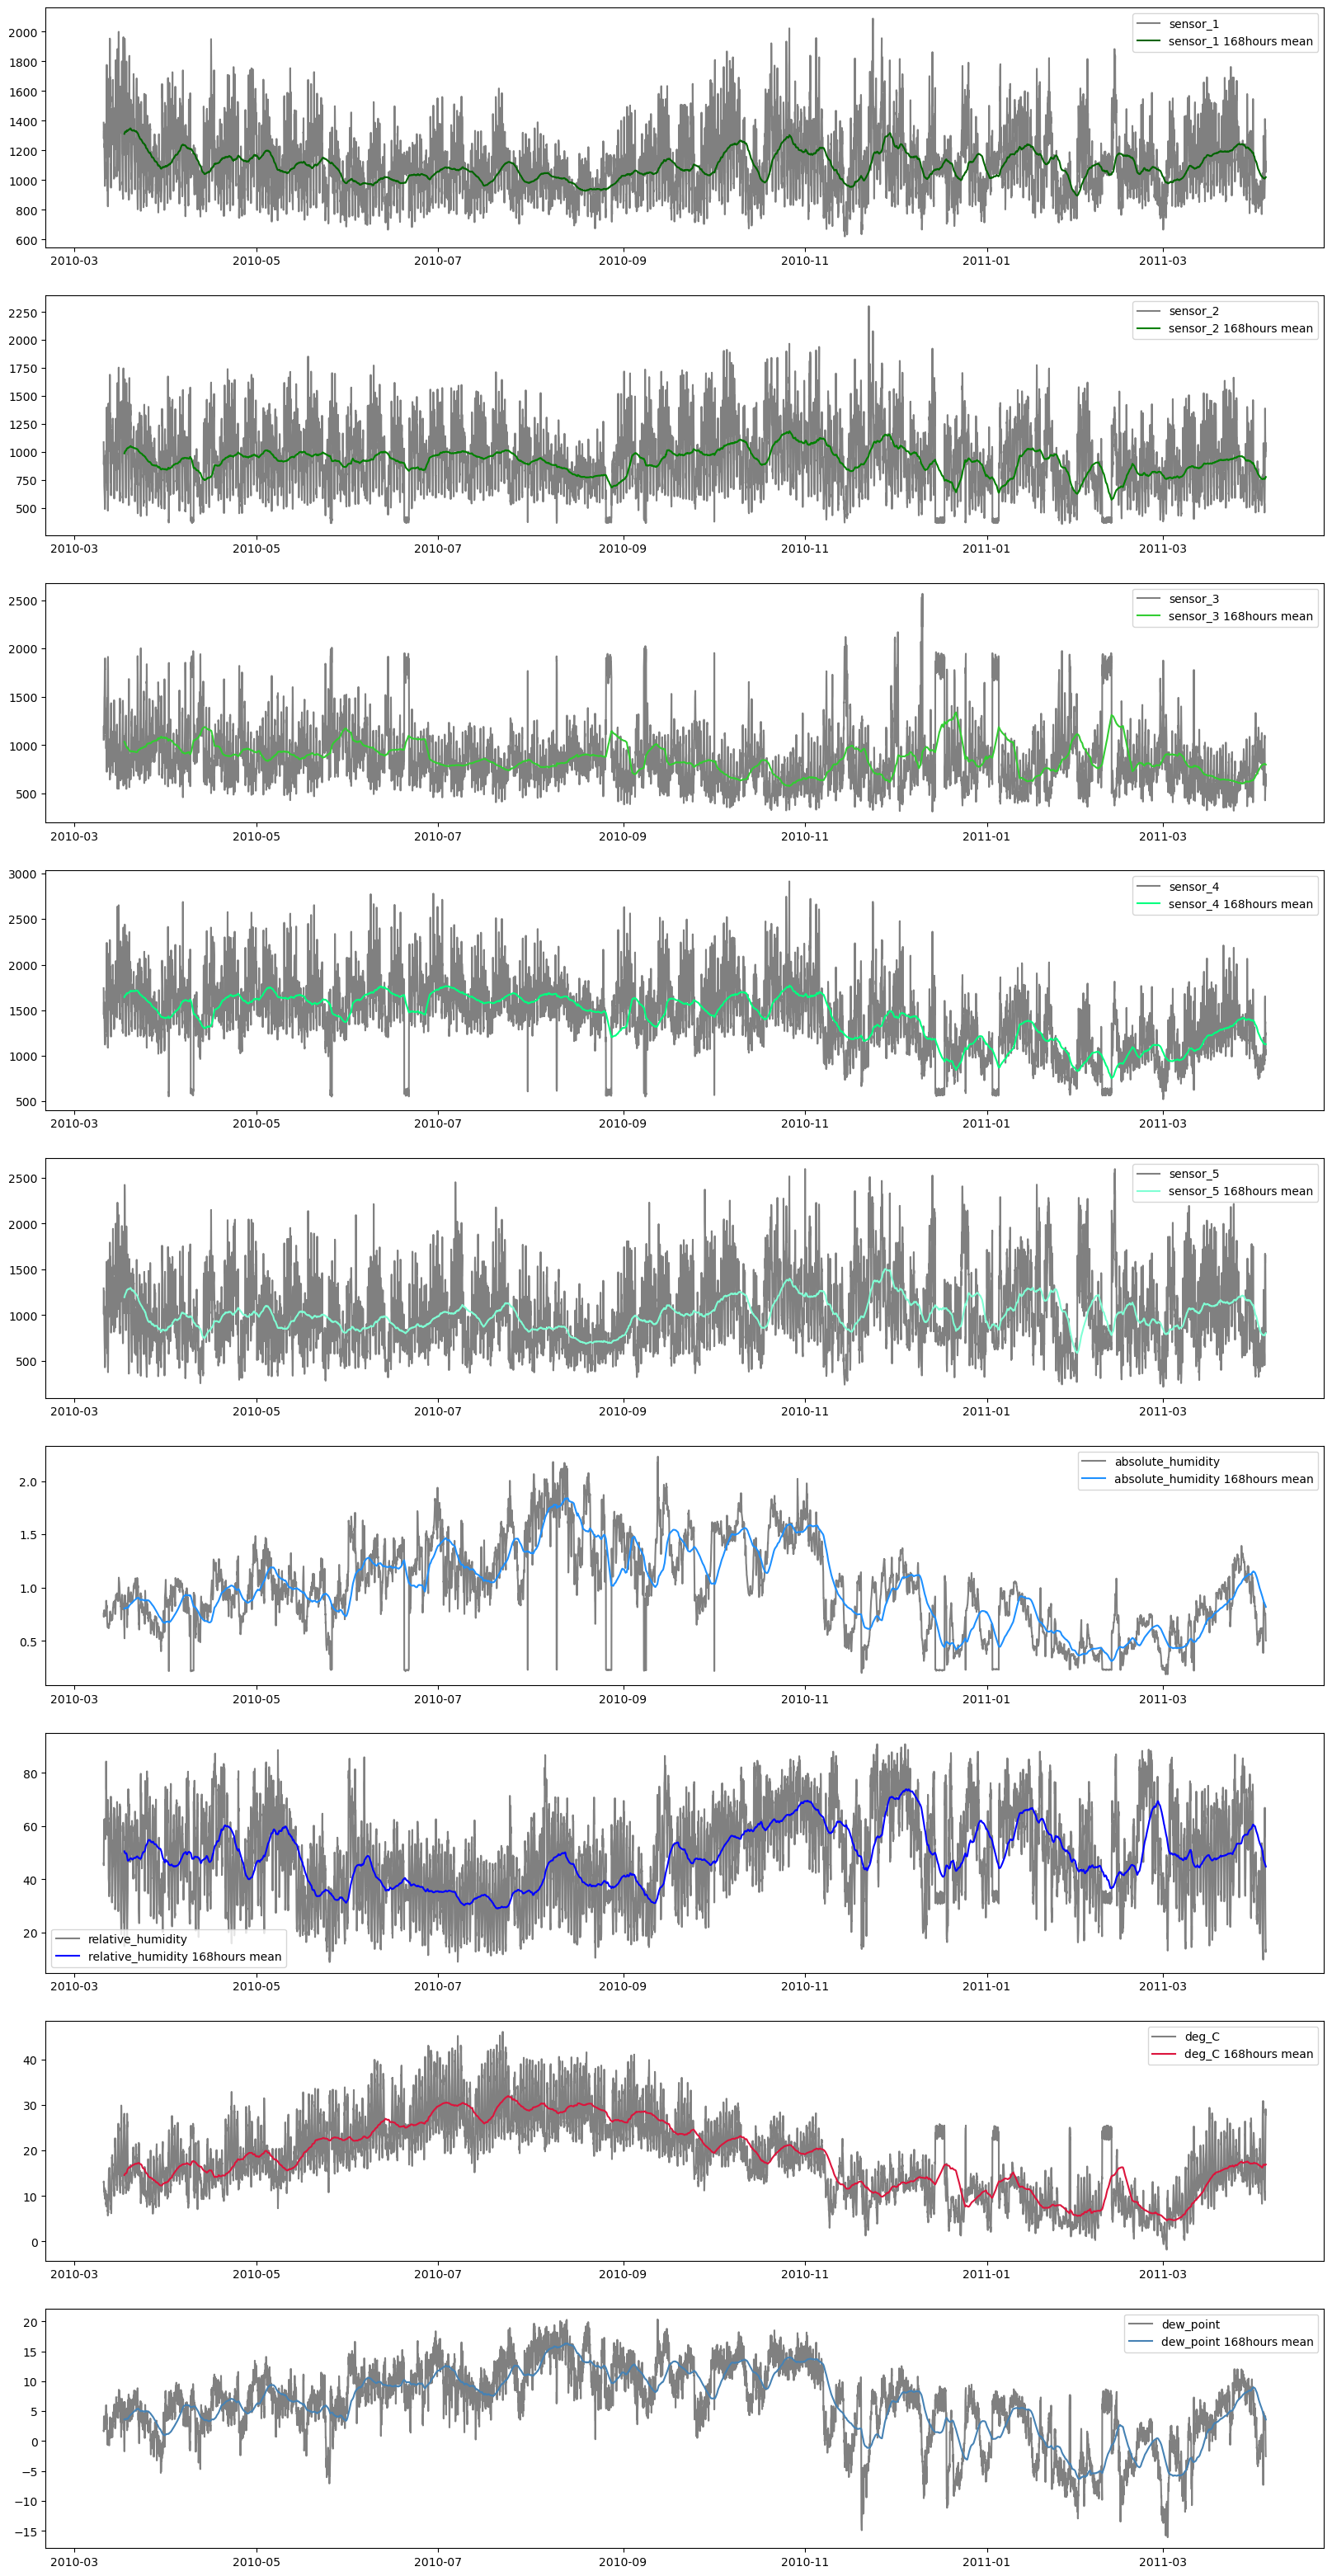

In [33]:
targets1 = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
targets2 = ['sensor_1_mean168', 'sensor_2_mean168', 'sensor_3_mean168', 'sensor_4_mean168', 'sensor_5_mean168', 
            'absolute_humidity_mean168', 'relative_humidity_mean168', 'deg_C_mean168', 'dew_point_mean168']
target_names = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
colors = ["darkgreen", "green", "limegreen", "springgreen", "aquamarine", "dodgerblue", "blue", "crimson", "steelblue"]

fig, axs = plt.subplots(figsize=(20,40), nrows=9, ncols=1)

for i in range(9):
    axs[i].plot(df_conc['date_time'], df_conc[targets1[i]], color='gray', label=target_names[i])
    axs[i].plot(df_conc['date_time'], df_conc[targets2[i]], color=colors[i], label=f'{target_names[i]} 168hours mean')
    axs[i].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

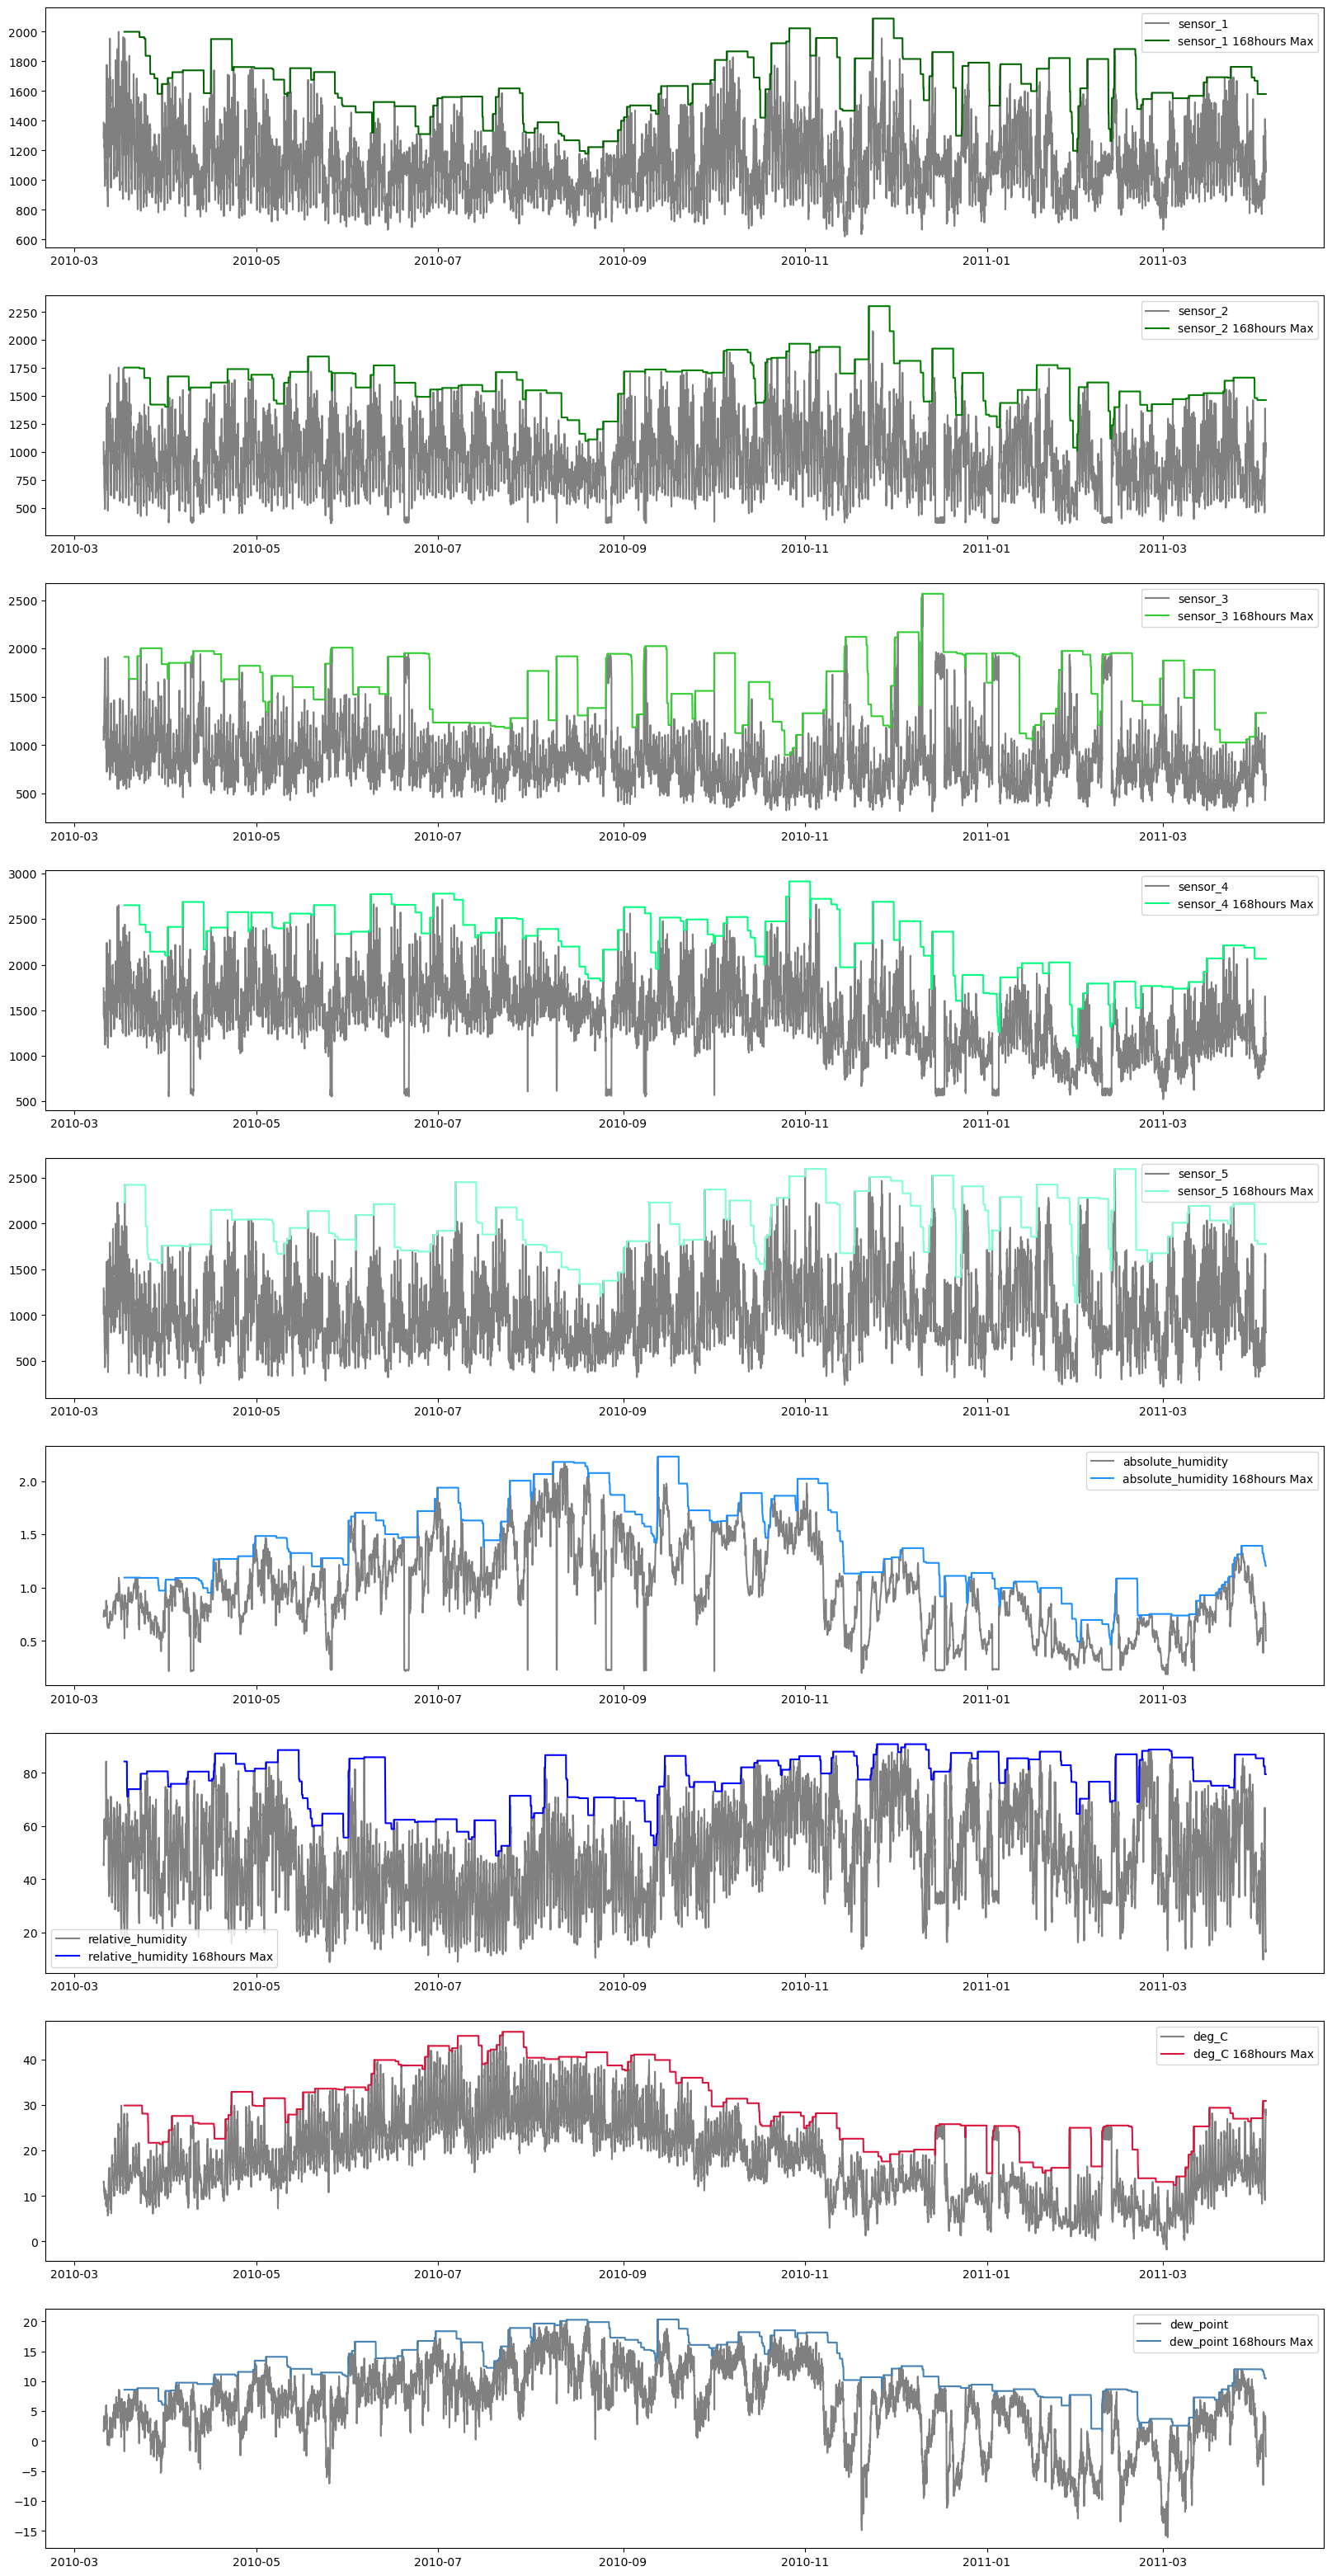

In [34]:
targets1 = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
targets2 = ['sensor_1_max168', 'sensor_2_max168', 'sensor_3_max168', 'sensor_4_max168', 'sensor_5_max168', 
            'absolute_humidity_max168', 'relative_humidity_max168', 'deg_C_max168', 'dew_point_max168']
target_names = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
colors = ["darkgreen", "green", "limegreen", "springgreen", "aquamarine", "dodgerblue", "blue", "crimson", "steelblue"]

fig, axs = plt.subplots(figsize=(20,40), nrows=9, ncols=1)

for i in range(9):
    axs[i].plot(df_conc['date_time'], df_conc[targets1[i]], color='gray', label=target_names[i])
    axs[i].plot(df_conc['date_time'], df_conc[targets2[i]], color=colors[i], label=f'{target_names[i]} 168hours Max')
    axs[i].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

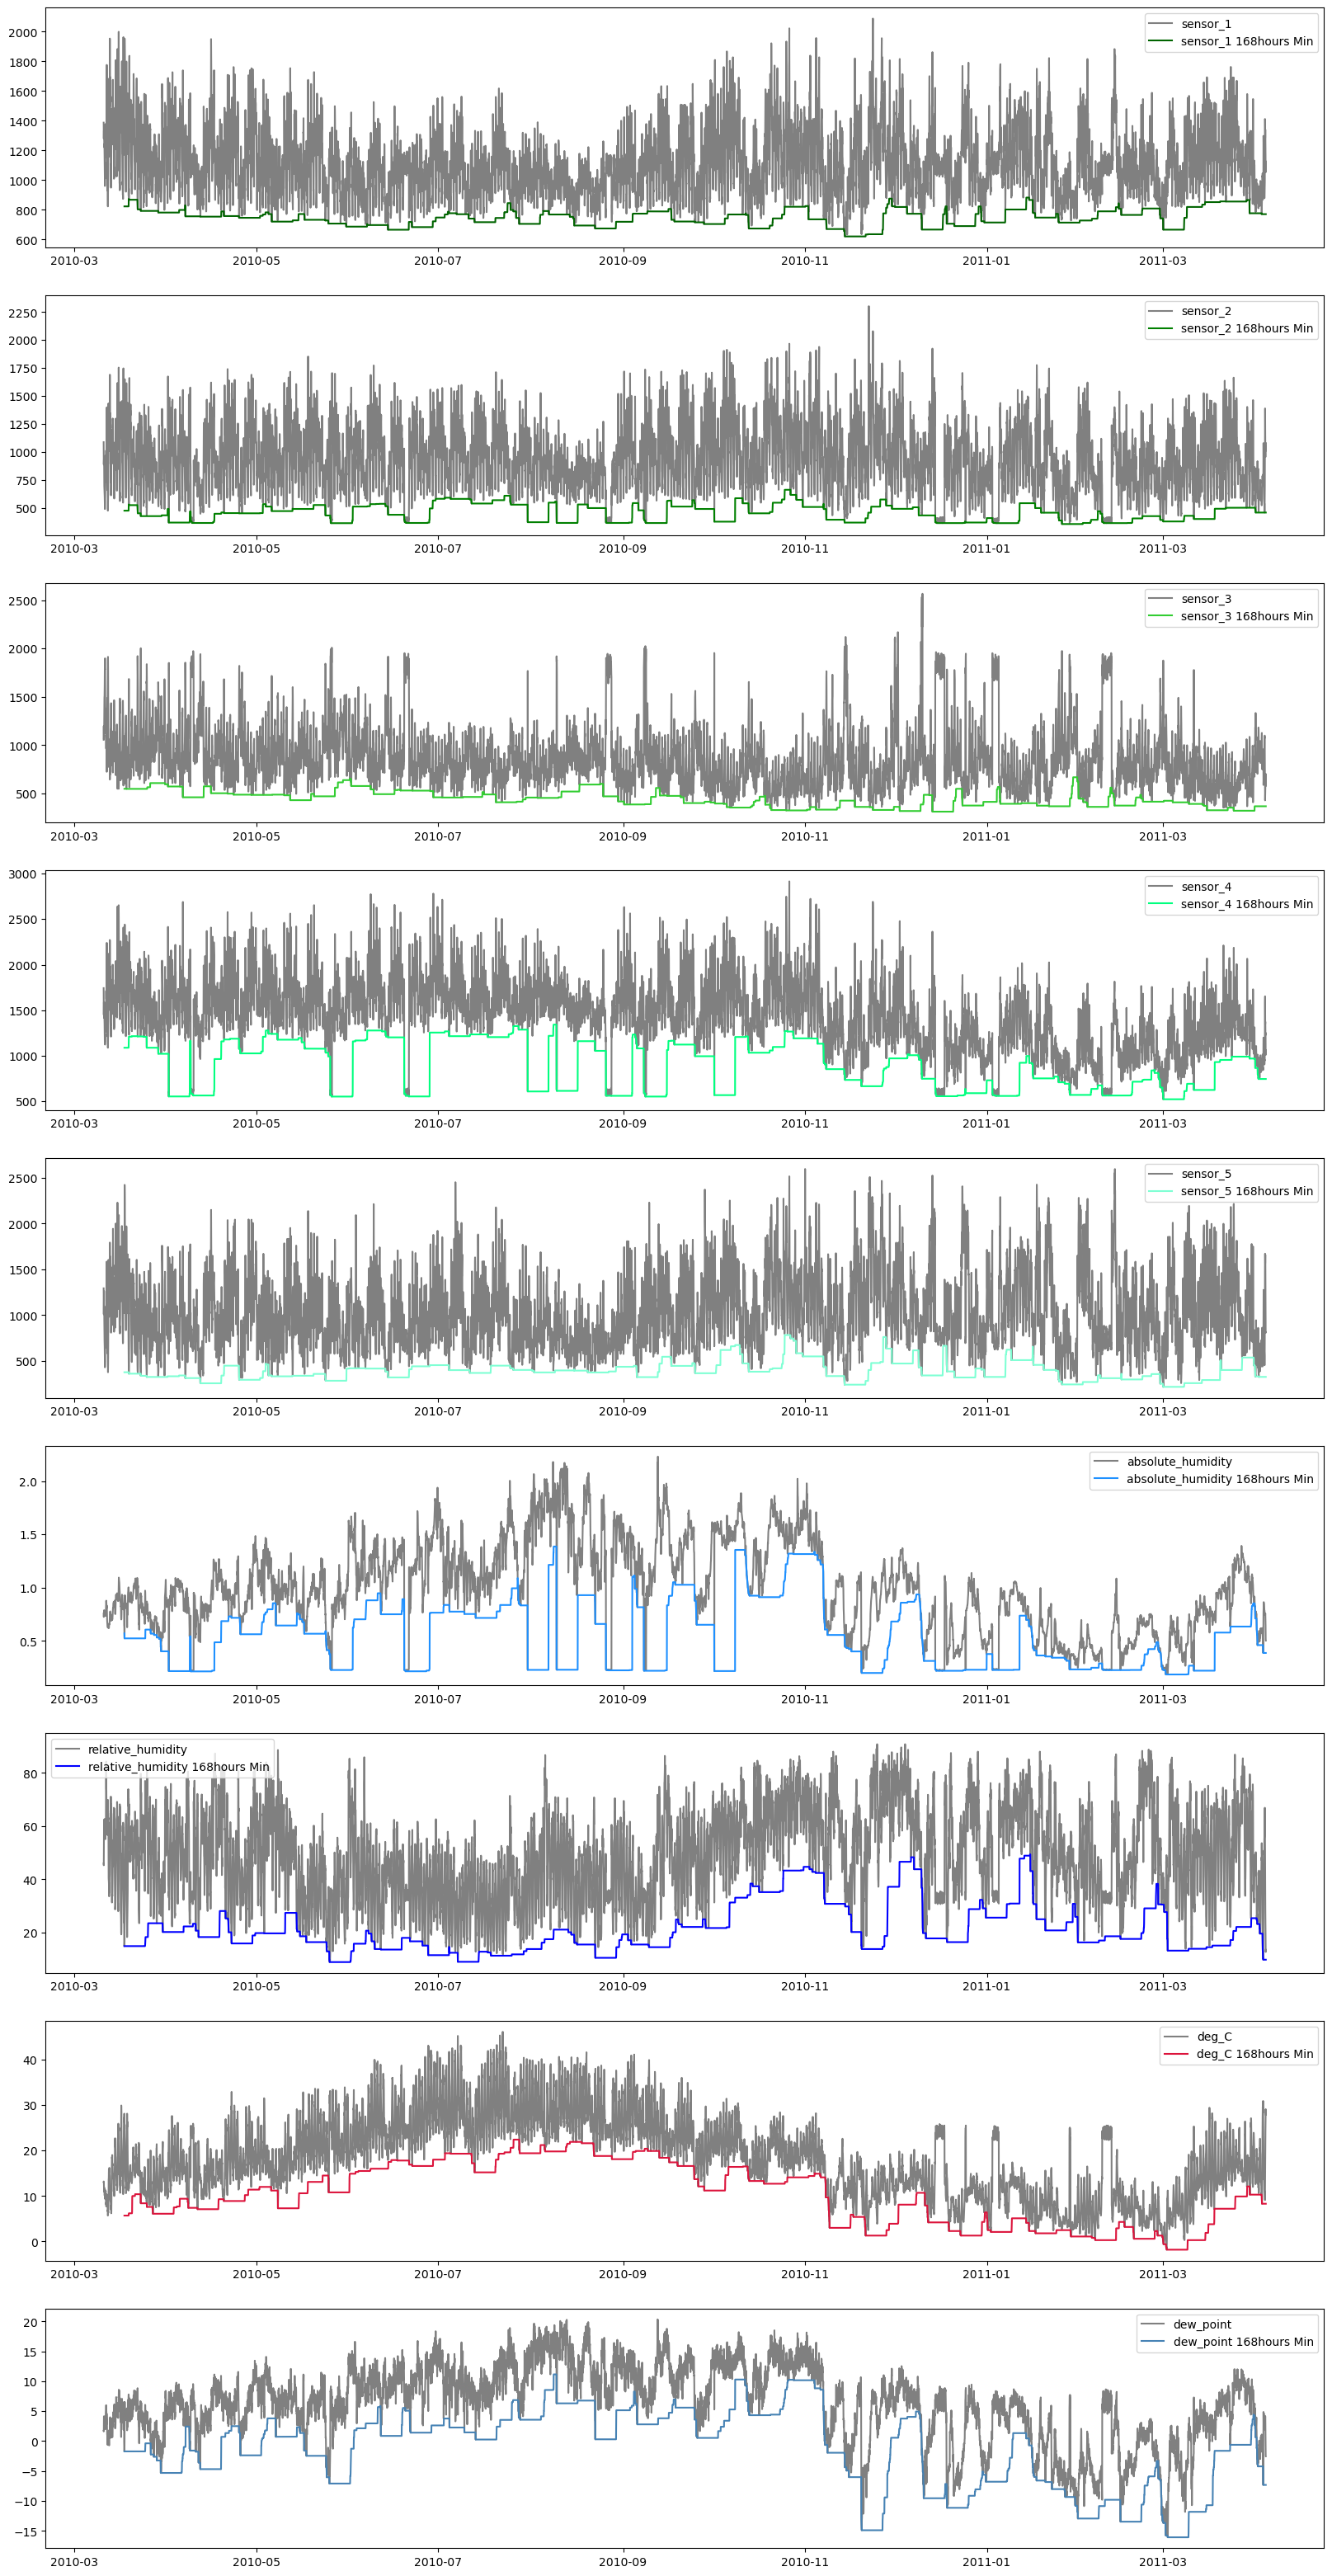

In [35]:
targets1 = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
targets2 = ['sensor_1_min168', 'sensor_2_min168', 'sensor_3_min168', 'sensor_4_min168', 'sensor_5_min168', 
            'absolute_humidity_min168', 'relative_humidity_min168', 'deg_C_min168', 'dew_point_min168']
target_names = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'absolute_humidity', 'relative_humidity', 'deg_C', 'dew_point']
colors = ["darkgreen", "green", "limegreen", "springgreen", "aquamarine", "dodgerblue", "blue", "crimson", "steelblue"]

fig, axs = plt.subplots(figsize=(20,40), nrows=9, ncols=1)

for i in range(9):
    axs[i].plot(df_conc['date_time'], df_conc[targets1[i]], color='gray', label=target_names[i])
    axs[i].plot(df_conc['date_time'], df_conc[targets2[i]], color=colors[i], label=f'{target_names[i]} 168hours Min')
    axs[i].legend()

plt.show

train, testに再分割、欠損値処理（テストデータの欠損値はnanのままにしておく）

In [36]:
df_conc = df_conc.replace(['NaN', 'None', ''], float('nan'))

train_processed = df_conc.iloc[0:7111].drop(columns=['index'])
test_processed = df_conc.iloc[7110:].drop(columns=['index', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])

train_processed['sensor_1_t-1'] = train_processed['sensor_1_t-1'].fillna(train_processed['sensor_1_t-1'].mean())
train_processed['sensor_1_t-2'] = train_processed['sensor_1_t-2'].fillna(train_processed['sensor_1_t-2'].mean())
train_processed['sensor_1_t-3'] = train_processed['sensor_1_t-3'].fillna(train_processed['sensor_1_t-3'].mean())
train_processed['sensor_1_t-4'] = train_processed['sensor_1_t-4'].fillna(train_processed['sensor_1_t-4'].mean())
train_processed['sensor_1_t-5'] = train_processed['sensor_1_t-5'].fillna(train_processed['sensor_1_t-5'].mean())
train_processed['sensor_1_t-6'] = train_processed['sensor_1_t-6'].fillna(train_processed['sensor_1_t-6'].mean())
train_processed['sensor_1_mean24'] = train_processed['sensor_1_mean24'].fillna(train_processed['sensor_1_mean24'].mean())
train_processed['sensor_1_mean168'] = train_processed['sensor_1_mean168'].fillna(train_processed['sensor_1_mean168'].mean())
train_processed['sensor_1_max24'] = train_processed['sensor_1_max24'].fillna(train_processed['sensor_1_max24'].mean())
train_processed['sensor_1_max168'] = train_processed['sensor_1_max168'].fillna(train_processed['sensor_1_max168'].mean())
train_processed['sensor_1_min24'] = train_processed['sensor_1_min24'].fillna(train_processed['sensor_1_min24'].mean())
train_processed['sensor_1_min168'] = train_processed['sensor_1_min168'].fillna(train_processed['sensor_1_min168'].mean())

train_processed['sensor_2_t-1'] = train_processed['sensor_2_t-1'].fillna(train_processed['sensor_2_t-1'].mean())
train_processed['sensor_2_t-2'] = train_processed['sensor_2_t-2'].fillna(train_processed['sensor_2_t-2'].mean())
train_processed['sensor_2_t-3'] = train_processed['sensor_2_t-3'].fillna(train_processed['sensor_2_t-3'].mean())
train_processed['sensor_2_t-4'] = train_processed['sensor_2_t-4'].fillna(train_processed['sensor_2_t-4'].mean())
train_processed['sensor_2_t-5'] = train_processed['sensor_2_t-5'].fillna(train_processed['sensor_2_t-5'].mean())
train_processed['sensor_2_t-6'] = train_processed['sensor_2_t-6'].fillna(train_processed['sensor_2_t-6'].mean())
train_processed['sensor_2_mean24'] = train_processed['sensor_2_mean24'].fillna(train_processed['sensor_2_mean24'].mean())
train_processed['sensor_2_mean168'] = train_processed['sensor_2_mean168'].fillna(train_processed['sensor_2_mean168'].mean())
train_processed['sensor_2_max24'] = train_processed['sensor_2_max24'].fillna(train_processed['sensor_2_max24'].mean())
train_processed['sensor_2_max168'] = train_processed['sensor_2_max168'].fillna(train_processed['sensor_2_max168'].mean())
train_processed['sensor_2_min24'] = train_processed['sensor_2_min24'].fillna(train_processed['sensor_2_min24'].mean())
train_processed['sensor_2_min168'] = train_processed['sensor_2_min168'].fillna(train_processed['sensor_2_min168'].mean())

train_processed['sensor_3_t-1'] = train_processed['sensor_3_t-1'].fillna(train_processed['sensor_3_t-1'].mean())
train_processed['sensor_3_t-2'] = train_processed['sensor_3_t-2'].fillna(train_processed['sensor_3_t-2'].mean())
train_processed['sensor_3_t-3'] = train_processed['sensor_3_t-3'].fillna(train_processed['sensor_3_t-3'].mean())
train_processed['sensor_3_t-4'] = train_processed['sensor_3_t-4'].fillna(train_processed['sensor_3_t-4'].mean())
train_processed['sensor_3_t-5'] = train_processed['sensor_3_t-5'].fillna(train_processed['sensor_3_t-5'].mean())
train_processed['sensor_3_t-6'] = train_processed['sensor_3_t-6'].fillna(train_processed['sensor_3_t-6'].mean())
train_processed['sensor_3_mean24'] = train_processed['sensor_3_mean24'].fillna(train_processed['sensor_3_mean24'].mean())
train_processed['sensor_3_mean168'] = train_processed['sensor_3_mean168'].fillna(train_processed['sensor_3_mean168'].mean())
train_processed['sensor_3_max24'] = train_processed['sensor_3_max24'].fillna(train_processed['sensor_3_max24'].mean())
train_processed['sensor_3_max168'] = train_processed['sensor_3_max168'].fillna(train_processed['sensor_3_max168'].mean())
train_processed['sensor_3_min24'] = train_processed['sensor_3_min24'].fillna(train_processed['sensor_3_min24'].mean())
train_processed['sensor_3_min168'] = train_processed['sensor_3_min168'].fillna(train_processed['sensor_3_min168'].mean())

train_processed['sensor_4_t-1'] = train_processed['sensor_4_t-1'].fillna(train_processed['sensor_4_t-1'].mean())
train_processed['sensor_4_t-2'] = train_processed['sensor_4_t-2'].fillna(train_processed['sensor_4_t-2'].mean())
train_processed['sensor_4_t-3'] = train_processed['sensor_4_t-3'].fillna(train_processed['sensor_4_t-3'].mean())
train_processed['sensor_4_t-4'] = train_processed['sensor_4_t-4'].fillna(train_processed['sensor_4_t-4'].mean())
train_processed['sensor_4_t-5'] = train_processed['sensor_4_t-5'].fillna(train_processed['sensor_4_t-5'].mean())
train_processed['sensor_4_t-6'] = train_processed['sensor_4_t-6'].fillna(train_processed['sensor_4_t-6'].mean())
train_processed['sensor_4_mean24'] = train_processed['sensor_4_mean24'].fillna(train_processed['sensor_4_mean24'].mean())
train_processed['sensor_4_mean168'] = train_processed['sensor_4_mean168'].fillna(train_processed['sensor_4_mean168'].mean())
train_processed['sensor_4_max24'] = train_processed['sensor_4_max24'].fillna(train_processed['sensor_4_max24'].mean())
train_processed['sensor_4_max168'] = train_processed['sensor_4_max168'].fillna(train_processed['sensor_4_max168'].mean())
train_processed['sensor_4_min24'] = train_processed['sensor_4_min24'].fillna(train_processed['sensor_4_min24'].mean())
train_processed['sensor_4_min168'] = train_processed['sensor_4_min168'].fillna(train_processed['sensor_4_min168'].mean())

train_processed['sensor_5_t-1'] = train_processed['sensor_5_t-1'].fillna(train_processed['sensor_5_t-1'].mean())
train_processed['sensor_5_t-2'] = train_processed['sensor_5_t-2'].fillna(train_processed['sensor_5_t-2'].mean())
train_processed['sensor_5_t-3'] = train_processed['sensor_5_t-3'].fillna(train_processed['sensor_5_t-3'].mean())
train_processed['sensor_5_t-4'] = train_processed['sensor_5_t-4'].fillna(train_processed['sensor_5_t-4'].mean())
train_processed['sensor_5_t-5'] = train_processed['sensor_5_t-5'].fillna(train_processed['sensor_5_t-5'].mean())
train_processed['sensor_5_t-6'] = train_processed['sensor_5_t-6'].fillna(train_processed['sensor_5_t-6'].mean())
train_processed['sensor_5_mean24'] = train_processed['sensor_5_mean24'].fillna(train_processed['sensor_5_mean24'].mean())
train_processed['sensor_5_mean168'] = train_processed['sensor_5_mean168'].fillna(train_processed['sensor_5_mean168'].mean())
train_processed['sensor_5_max24'] = train_processed['sensor_5_max24'].fillna(train_processed['sensor_5_max24'].mean())
train_processed['sensor_5_max168'] = train_processed['sensor_5_max168'].fillna(train_processed['sensor_5_max168'].mean())
train_processed['sensor_5_min24'] = train_processed['sensor_5_min24'].fillna(train_processed['sensor_5_min24'].mean())
train_processed['sensor_5_min168'] = train_processed['sensor_5_min168'].fillna(train_processed['sensor_5_min168'].mean())

train_processed['absolute_humidity_t-1'] = train_processed['absolute_humidity_t-1'].fillna(train_processed['absolute_humidity_t-1'].mean())
train_processed['absolute_humidity_t-2'] = train_processed['absolute_humidity_t-2'].fillna(train_processed['absolute_humidity_t-2'].mean())
train_processed['absolute_humidity_t-3'] = train_processed['absolute_humidity_t-3'].fillna(train_processed['absolute_humidity_t-3'].mean())
train_processed['absolute_humidity_t-4'] = train_processed['absolute_humidity_t-4'].fillna(train_processed['absolute_humidity_t-4'].mean())
train_processed['absolute_humidity_t-5'] = train_processed['absolute_humidity_t-5'].fillna(train_processed['absolute_humidity_t-5'].mean())
train_processed['absolute_humidity_t-6'] = train_processed['absolute_humidity_t-6'].fillna(train_processed['absolute_humidity_t-6'].mean())
train_processed['absolute_humidity_mean24'] = train_processed['absolute_humidity_mean24'].fillna(train_processed['absolute_humidity_mean24'].mean())
train_processed['absolute_humidity_mean168'] = train_processed['absolute_humidity_mean168'].fillna(train_processed['absolute_humidity_mean168'].mean())
train_processed['absolute_humidity_max24'] = train_processed['absolute_humidity_max24'].fillna(train_processed['absolute_humidity_max24'].mean())
train_processed['absolute_humidity_max168'] = train_processed['absolute_humidity_max168'].fillna(train_processed['absolute_humidity_max168'].mean())
train_processed['absolute_humidity_min24'] = train_processed['absolute_humidity_min24'].fillna(train_processed['absolute_humidity_min24'].mean())
train_processed['absolute_humidity_min168'] = train_processed['absolute_humidity_min168'].fillna(train_processed['absolute_humidity_min168'].mean())

train_processed['relative_humidity_t-1'] = train_processed['relative_humidity_t-1'].fillna(train_processed['relative_humidity_t-1'].mean())
train_processed['relative_humidity_t-2'] = train_processed['relative_humidity_t-2'].fillna(train_processed['relative_humidity_t-2'].mean())
train_processed['relative_humidity_t-3'] = train_processed['relative_humidity_t-3'].fillna(train_processed['relative_humidity_t-3'].mean())
train_processed['relative_humidity_t-4'] = train_processed['relative_humidity_t-4'].fillna(train_processed['relative_humidity_t-4'].mean())
train_processed['relative_humidity_t-5'] = train_processed['relative_humidity_t-5'].fillna(train_processed['relative_humidity_t-5'].mean())
train_processed['relative_humidity_t-6'] = train_processed['relative_humidity_t-6'].fillna(train_processed['relative_humidity_t-6'].mean())
train_processed['relative_humidity_mean24'] = train_processed['relative_humidity_mean24'].fillna(train_processed['relative_humidity_mean24'].mean())
train_processed['relative_humidity_mean168'] = train_processed['relative_humidity_mean168'].fillna(train_processed['relative_humidity_mean168'].mean())
train_processed['relative_humidity_max24'] = train_processed['relative_humidity_max24'].fillna(train_processed['relative_humidity_max24'].mean())
train_processed['relative_humidity_max168'] = train_processed['relative_humidity_max168'].fillna(train_processed['relative_humidity_max168'].mean())
train_processed['relative_humidity_min24'] = train_processed['relative_humidity_min24'].fillna(train_processed['relative_humidity_min24'].mean())
train_processed['relative_humidity_min168'] = train_processed['relative_humidity_min168'].fillna(train_processed['relative_humidity_min168'].mean())

train_processed['deg_C_t-1'] = train_processed['deg_C_t-1'].fillna(train_processed['deg_C_t-1'].mean())
train_processed['deg_C_t-2'] = train_processed['deg_C_t-2'].fillna(train_processed['deg_C_t-2'].mean())
train_processed['deg_C_t-3'] = train_processed['deg_C_t-3'].fillna(train_processed['deg_C_t-3'].mean())
train_processed['deg_C_t-4'] = train_processed['deg_C_t-4'].fillna(train_processed['deg_C_t-4'].mean())
train_processed['deg_C_t-5'] = train_processed['deg_C_t-5'].fillna(train_processed['deg_C_t-5'].mean())
train_processed['deg_C_t-6'] = train_processed['deg_C_t-6'].fillna(train_processed['deg_C_t-6'].mean())
train_processed['deg_C_mean24'] = train_processed['deg_C_mean24'].fillna(train_processed['deg_C_mean24'].mean())
train_processed['deg_C_mean168'] = train_processed['deg_C_mean168'].fillna(train_processed['deg_C_mean168'].mean())
train_processed['deg_C_max24'] = train_processed['deg_C_max24'].fillna(train_processed['deg_C_max24'].mean())
train_processed['deg_C_max168'] = train_processed['deg_C_max168'].fillna(train_processed['deg_C_max168'].mean())
train_processed['deg_C_min24'] = train_processed['deg_C_min24'].fillna(train_processed['deg_C_min24'].mean())
train_processed['deg_C_min168'] = train_processed['deg_C_min168'].fillna(train_processed['deg_C_min168'].mean())

train_processed['dew_point_t-1'] = train_processed['dew_point_t-1'].fillna(train_processed['dew_point_t-1'].mean())
train_processed['dew_point_t-2'] = train_processed['dew_point_t-2'].fillna(train_processed['dew_point_t-2'].mean())
train_processed['dew_point_t-3'] = train_processed['dew_point_t-3'].fillna(train_processed['dew_point_t-3'].mean())
train_processed['dew_point_t-4'] = train_processed['dew_point_t-4'].fillna(train_processed['dew_point_t-4'].mean())
train_processed['dew_point_t-5'] = train_processed['dew_point_t-5'].fillna(train_processed['dew_point_t-5'].mean())
train_processed['dew_point_t-6'] = train_processed['dew_point_t-6'].fillna(train_processed['dew_point_t-6'].mean())
train_processed['dew_point_mean24'] = train_processed['dew_point_mean24'].fillna(train_processed['dew_point_mean24'].mean())
train_processed['dew_point_mean168'] = train_processed['dew_point_mean168'].fillna(train_processed['dew_point_mean168'].mean())
train_processed['dew_point_max24'] = train_processed['dew_point_max24'].fillna(train_processed['dew_point_max24'].mean())
train_processed['dew_point_max168'] = train_processed['dew_point_max168'].fillna(train_processed['dew_point_max168'].mean())
train_processed['dew_point_min24'] = train_processed['dew_point_min24'].fillna(train_processed['dew_point_min24'].mean())
train_processed['dew_point_min168'] = train_processed['dew_point_min168'].fillna(train_processed['dew_point_min168'].mean())

csvに書き出します

In [37]:
train_processed.to_csv('train_timeseries_features_added.csv', index=False)
test_processed.to_csv('test_timeseries_features_added.csv', index=False)